In [1]:
# modifiey from https://github.com/OpenGVLab/InternImage/blob/master/detection/image_demo.py
import mmcv, requests
import mmcv_custom
import mmdet_custom
from pathlib import Path
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

/workspace/FishEye8k/fisheye_challenge/ops_dcnv3/modules/dcnv3.py:20: UserWarning: Now, we support DCNv4 in InternImage.
  warnings.warn('Now, we support DCNv4 in InternImage.')


In [2]:
data_dir   = "/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/test/images/"
config     = "configs/cascade_internimage_xl_fpn_3x_coco.py"
checkpoint = "checkpoints/cascade_internimage_xl_fpn_3x_coco.pth"
output     = "results"

In [3]:
if not Path(checkpoint).exists():
  print("Model checkpoint doesn't exist. Downloading...")
  response = requests.get("https://huggingface.co/OpenGVLab/InternImage/resolve/main/cascade_internimage_xl_fpn_3x_coco.pth")
  Path(checkpoint).write_bytes(response.content)

In [4]:
# build the model from a config file and a checkpoint file
model = init_detector(config, checkpoint, device="cuda:0")
# TODO: calculate model params and flops

2024-02-21 05:03:26,056 - mmdet - INFO - using core type: DCNv3
2024-02-21 05:03:26,057 - mmdet - INFO - using activation layer: GELU
2024-02-21 05:03:26,057 - mmdet - INFO - using main norm layer: LN
2024-02-21 05:03:26,058 - mmdet - INFO - using dpr: linear, 0.6
2024-02-21 05:03:26,058 - mmdet - INFO - level2_post_norm: False
2024-02-21 05:03:26,059 - mmdet - INFO - level2_post_norm_block_ids: None
2024-02-21 05:03:26,059 - mmdet - INFO - res_post_norm: False
2024-02-21 05:03:26,059 - mmdet - INFO - use_dcn_v4_op: False


load checkpoint from local path: checkpoints/cascade_internimage_xl_fpn_3x_coco.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: roi_head.mask_head.0.convs.0.conv.weight, roi_head.mask_head.0.convs.0.conv.bias, roi_head.mask_head.0.convs.1.conv.weight, roi_head.mask_head.0.convs.1.conv.bias, roi_head.mask_head.0.convs.2.conv.weight, roi_head.mask_head.0.convs.2.conv.bias, roi_head.mask_head.0.convs.3.conv.weight, roi_head.mask_head.0.convs.3.conv.bias, roi_head.mask_head.0.upsample.weight, roi_head.mask_head.0.upsample.bias, roi_head.mask_head.0.conv_logits.weight, roi_head.mask_head.0.conv_logits.bias, roi_head.mask_head.1.convs.0.conv.weight, roi_head.mask_head.1.convs.0.conv.bias, roi_head.mask_head.1.convs.1.conv.weight, roi_head.mask_head.1.convs.1.conv.bias, roi_head.mask_head.1.convs.2.conv.weight, roi_head.mask_head.1.convs.2.conv.bias, roi_head.mask_head.1.convs.3.conv.weight, roi_head.mask_head.1.convs.3.conv.bias, roi_head.mask_h

/opt/conda/lib/python3.10/site-packages/mmdet/apis/inference.py:51: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [5]:
img = "camera1_A_100.png" 
img_dir = data_dir + img 

In [6]:
# test a single image
result = inference_detector(model, img_dir)

/opt/conda/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [7]:
mmcv.mkdir_or_exist(output)
out_file = Path(output) / Path(img)
# show the results
model.show_result(
  img_dir,
  result,
  score_thr=0.3,
  show=False,
  bbox_color="coco",
  text_color=(200, 200, 200),
  mask_color="coco",
  out_file=out_file
)
print(f"Result is save at {out_file}")

Result is save at results/camera1_A_100.png


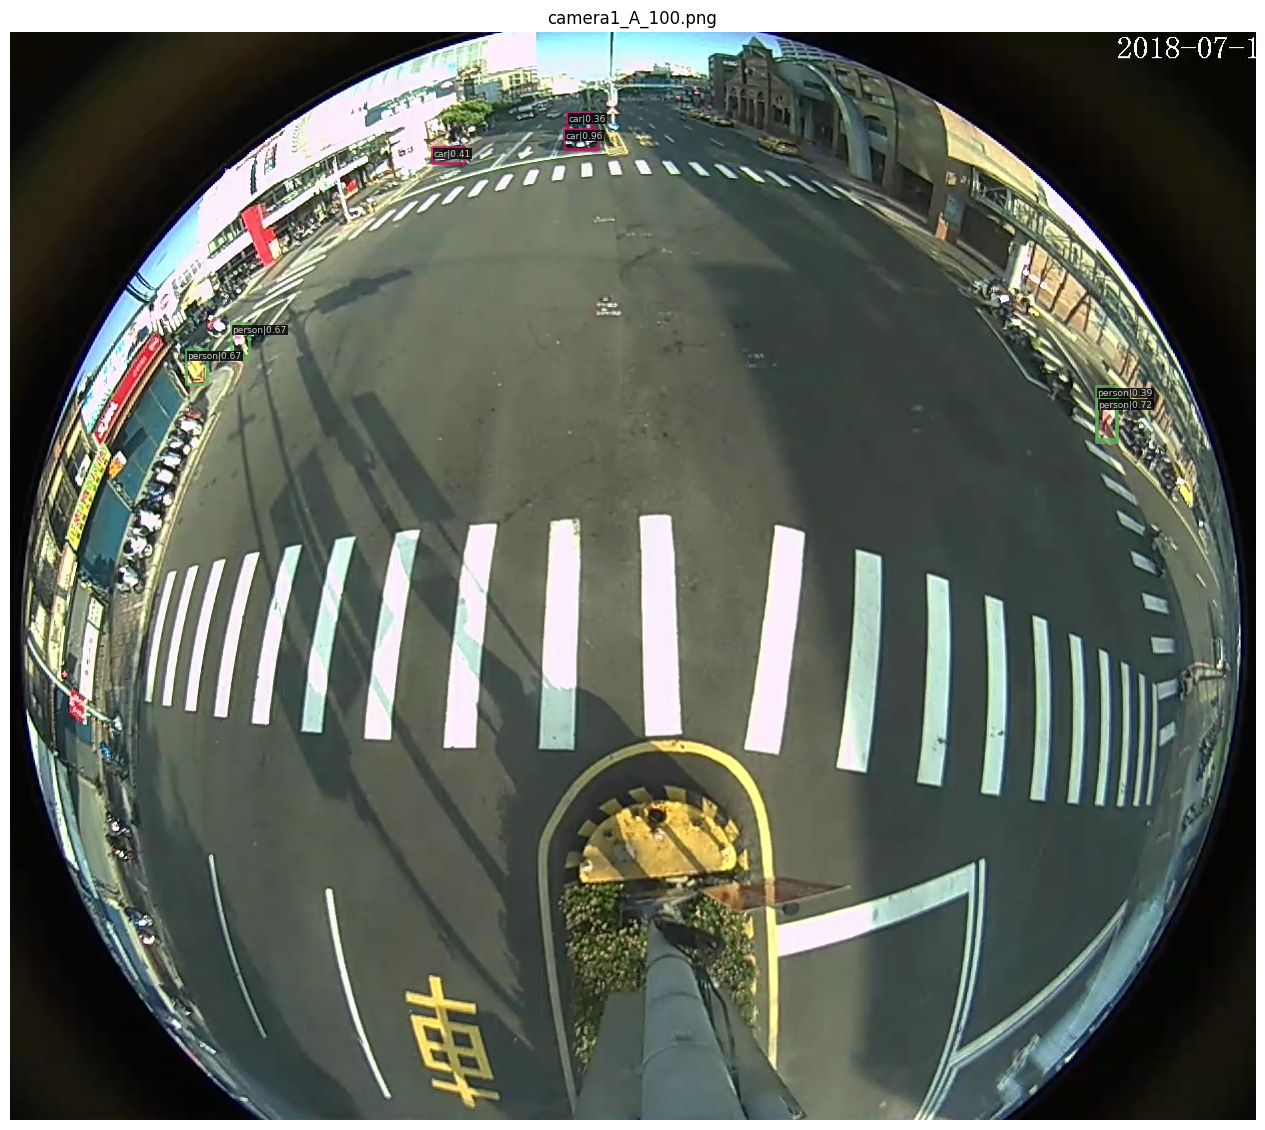

In [8]:
show_result_pyplot(model, img_dir, result, 0.3, img)